# Análisis de Datos Exploratorio, _EDA_

**Análisis previo de los datos o cómo luchar contra la impaciencia por analizar los datos**

<br>
<br>
<br>
<br>
<br>
<br>

**Ibon Martínez-Arranz** | OWL Metabolomics, S.L.  
imartinez@owlmetabolomics.com  
https://github.com/imarranz/EDA_Course
<br>
<br>
_11 de Febrero de 2020_

Hay que evitar estas situaciones cuando nos encontramos ante unos datos para analizar. Las prisas por obtener resultados sólo nos harán trabajar el doble.

<center>
<img src="./../images/mr_bean.gif" alt = "Smr_bean" width = "400"> 
</center>

Antes de analizar o aplicar cualquier test a nuestros datos debemos:

 * Analizar y comprender nuestros datos
    * Análisis gráfico

  * Estudiar los datos perdidos
    * ¿Cuales pueden ser las causas?
    * ¿Hay algún patrón que explique los datos perdidos?

  * Estudiar los casos atípicos

  * Comprobación de los supuestos para aplicar test paramétricos: normalidad, igualdad de varianzas, ...

# Análisis Previo de los Datos

**El examen previo de los datos es una parte esencial del análisis multivariante**

Con un análisis previo ganaremos:

  * Compresión básica de los datos
  * Conocimiento sobre la relación entre variables

En esta presentación utilizaremos mayoritariamente Python y las librerías de _Data Science_ propias de este lenguaje:

  * **Pandas** es una librería que permite manipular grandes conjuntos de datos en tablas con facilidad. Además permite importar y exportar esos datos.
  * **NumPy** sirve para realizar cálculos numéricos con matrices de forma sencilla y eficiente y tanto SciPy como Pandas la usan de forma interna. NumPy es la base del stack científico de Python.
  * **SciPy** es una colección de módulos dedicados a diversas áreas científicas. Nosotros usaremos principalmente el módulo stats.
  

Y librerías gráficas:

  * **Matplotlib** permite realizar gráficos y diagramas con facilidad, mostrarlos en pantalla o guardarlos a archivos.
  * **Seaborn** permite, basándose en matplotlib, crear gráficos relacionales (_facet_).
  * **yellowbrick** ayuda a la visualización de datos multivariantes.

**Recursos**

  * [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)  
  * [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)  
  * [PyPlot Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)  
  * [An Introduction to seaborn](https://seaborn.pydata.org/introduction.html)  
 

In [58]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.features import RadViz, JointPlotVisualizer, ParallelCoordinates

sns.set_style('dark')

from sklearn.datasets import load_iris

## Examen Gráfico de los Datos

Cuando se considera un análisis univariante es muy fácil entender el comportamiento de la variable. Incluso sin una representación gráfica. Cuando pasamos al análisis multivariante la complejidad del problema aumentan considerablemente. Las técnicas gráficas nos ayudarán muchísimo a comprender nuestros datos.

Con ellas entenderemos:

  * La **distribución** de las variables  
  
  * Las **relaciones bivariantes**  
  
  * las **diferencias** entre grupos  
  
  * Los **perfiles multivariantes**

<center>
<img src="./../images/rightchart.png" alt="What would you like to show?" width="800"> 
</center>

Source: https://conorneill.com

In [62]:
# Cargamos los datos
data = load_iris(return_X_y = False)

df = pd.DataFrame(data.data, columns = data.feature_names)
df['Species'] = data.target
df['Species'].replace({0: data.target_names[0], 
                       1: data.target_names[1], 
                       2: data.target_names[2]}, inplace = True)
df.head().style.set_caption('<b>TABLA</b>: Primeras cinco observaciones del DataFrame.')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa


In [21]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

<center>
<img src="./../images/pandas_profiling.png" alt="pandas profiling" width="700"> 
</center>

**FIGURA**: Resumen obtenido al aplicar _pandas-profiling_.

Usamos `.shape` para estudiar el número de filas y columnas de nuestro _DataFrame_.

In [22]:
df.shape

(150, 5)

Usamos el método `.describe` para obtener un resumen estadístico de las cuatro variables numéricas.

In [23]:
df.describe()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Análisis de la forma de la distribución

Como ya hemos comentado, hay muchas librerías gráficas, caben destacar:

  * En R: ggplot
  * En Python: matplotlib, seaborn, altair
  * Compatibles con ambas: bokeh
  

El histograma es el mejor tipo de gráfico para estudiar la distribución de una variable.

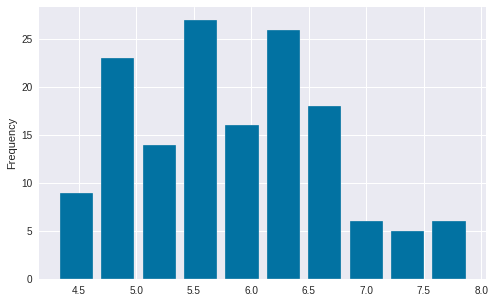

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))
df['sepal_length_(cm)'].plot(kind = 'hist', ax = ax, rwidth = 0.8)
plt.show()

**FIGURA**: Distribución de la variable _Sepal Length (cm)_.

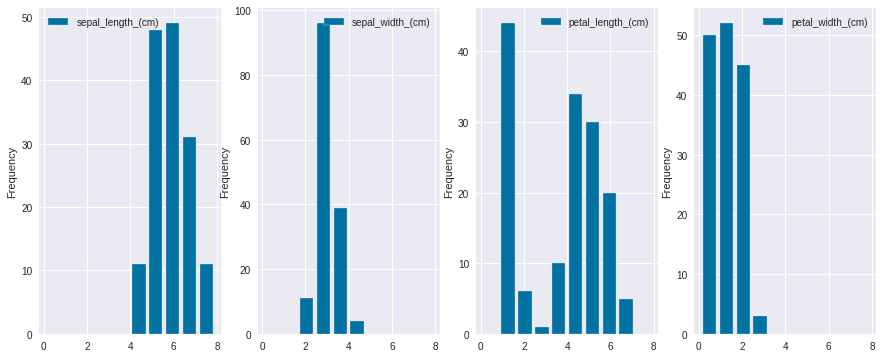

In [25]:
df.iloc[:, :4].plot(kind = 'hist', subplots = True, layout = (1,4), figsize = (15, 6), sharex = False, sharey = False, rwidth = 0.8, legend = True, color = 'C0')
plt.show()

**FIGURA**: Distribución de cuatro variables continuas de nuestro _DataFrame_.

### Relación entre variables

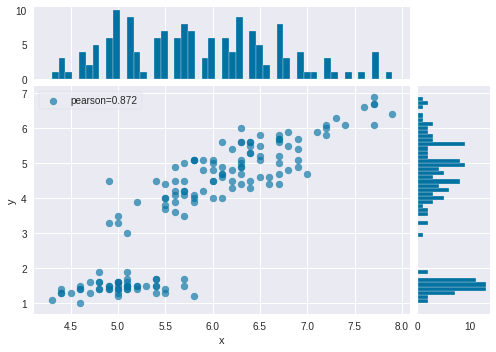

In [26]:
X = df[['sepal_length_(cm)', 'petal_length_(cm)']]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))
jpv = JointPlotVisualizer()
jpv.fit(X = X['sepal_length_(cm)'], y = X['petal_length_(cm)'])
jpv.show()
plt.show()

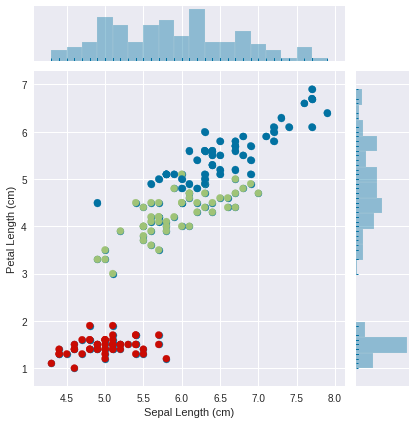

In [27]:
X = df[['sepal_length_(cm)', 'petal_length_(cm)']]

g = sns.jointplot(x = X['sepal_length_(cm)'], y = X['petal_length_(cm)'],
                 marginal_kws = dict(bins = 18, rug = True, ))
g.ax_joint.scatter(X['sepal_length_(cm)'], 
                   X['petal_length_(cm)'], 
                   c = ['r'] * 50 + ['g'] * 50 + ['b'] * 50)
g.ax_joint.set_xlabel('Sepal Length (cm)')
g.ax_joint.set_ylabel('Petal Length (cm)')

plt.show()

In [63]:
df.corr()\
    .style\
        .background_gradient(cmap = 'coolwarm', axis = None)\
        .format('{:.3f}')\
        .set_caption('<b>TABLA</b>: Correlación entre variables.')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000,-0.118,0.872,0.818
sepal width (cm),-0.118,1.000,-0.428,-0.366
petal length (cm),0.872,-0.428,1.000,0.963
petal width (cm),0.818,-0.366,0.963,1.000


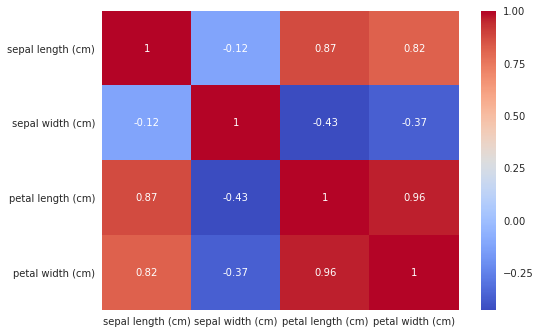

In [69]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

### Diferencias entre grupos

El gráfico de referencia para mostrar diferencias entre grupos e incluso una breve descripción de la distribución de la variable son los gráficos _boxplot_.

<center>    
<img src=".././images/boxplot_interpretation.png" alt = "Interpretación de un gráfico boxplot" style="width:600px;" />  
<b>FIGURA</b>: Interpretación de un gráfico boxplot.
</center>

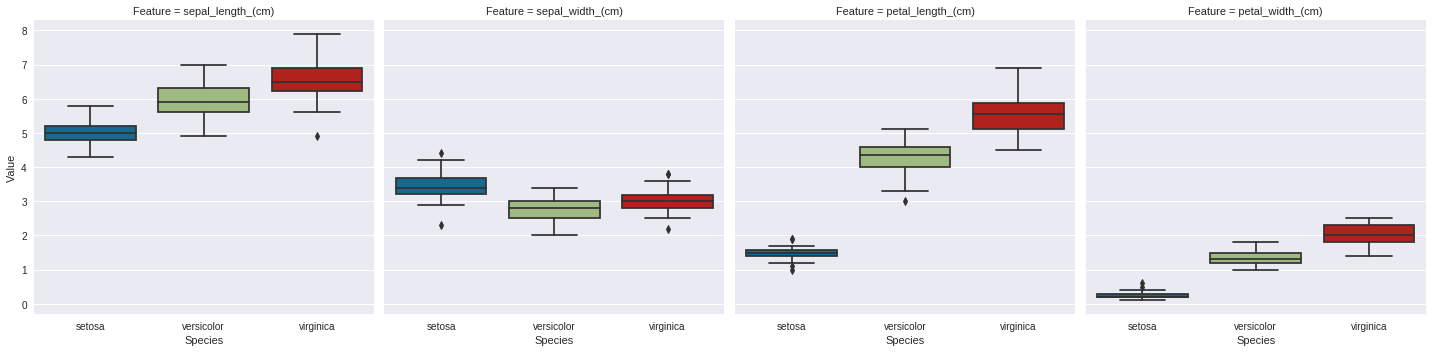

In [29]:
sns.catplot(kind = 'box', 
            x = 'Species', 
            y = 'Value', 
            col = 'Feature', 
            data = df.melt(id_vars = ['Species'], 
                           var_name = 'Feature', 
                           value_name = 'Value'))
plt.show()

### Perfiles multivariantes

#### RadViz

**RadViz** es un algoritmo de visualización de datos multivariante que traza cada dimensión de entidad de manera uniforme alrededor de una circunferencia y luego representa las observaciones mediante puntos en el interior del círculo. Es muy útil para visualizar diferencias entre grupos considerando todo el _DataFrame_.

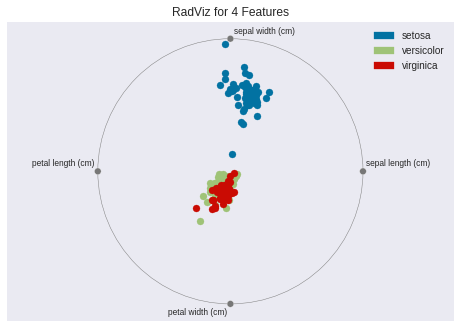

In [32]:
data = load_iris(return_X_y = False)
X = data.data
y = data.target
visualizer = RadViz(classes = data.target_names, features = data.feature_names)

visualizer.fit(X, y)           # Ajustamos los datos al visualizador
visualizer.transform(X)        # Transformamos los datos
visualizer.show()              # Mostramos la figura
plt.show()

Intuitivamente podemos ver que la característica _sepal width (cm)_ toma valores proporcionalmente más elevados en el grupo _setosa_, pues los puntos correspondientes a este grupo se muestran más próximos a esta característica. Podemos confirmar este hecho fácilmente:

In [33]:
X = pd.DataFrame(data.data, columns = data.feature_names)
X.groupby(y).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


#### Parallel Coordinates o Gráficos de Coordenadas Paralelas

Este tipo de visualización se utiliza para trazar datos numéricos multivariados. Los gráficos de coordenadas paralelas son ideales para comparar muchas variables y ver las relaciones entre ellas. 

En un gráfico de coordenadas paralelas, cada variable recibe su propio eje y todos los ejes se colocan en paralelo entre sí. Cada eje puede tener una escala diferente, ya que cada variable trabaja con una unidad de medida diferente, o todos los ejes pueden normalizarse para mantener todas las escalas uniformes.

El orden en el que están dispuestos los ejes puede afectar la forma de entender los datos. Una razón para esto es que las relaciones entre variables adyacentes son más fáciles de percibir que para las variables no adyacentes. Por lo tanto, volver a ordenar los ejes nos puede ayudar a descubrir patrones o correlaciones entre variables.

La desventaja de este análisis, es que pueden acabar demasiado abarrotadas y, por tanto, ilegibles cuando tienen muchos datos.

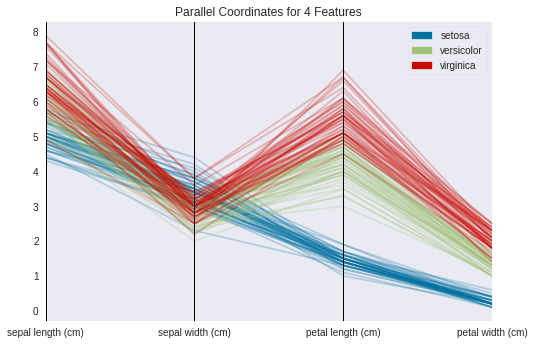

In [34]:
visualizer = ParallelCoordinates(classes = data.target_names)
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

visualizer.fit(X, y)           # Ajustamos los datos al visualizador
visualizer.transform(X)        # Transformamos los datos
visualizer.show()              # Mostramos la figura
plt.show()

Intuitivamente podemos ver que la característica _petal length (cm)_ toma valores proporcionalmente más elevados en el grupo _versicolor_ y _virginica_. 

#### Análisis de Componentes Principales (PCA, Principal Component Analysis)

El Análisis de Componentes Principales es una metodología estadística muy útil para describir un conjunto de datos multivariante en términos de nuevas variables denominadas _componentes_.

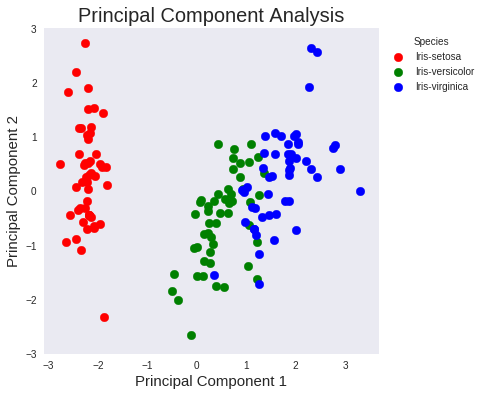

In [35]:
%run '../scripts/pca.py'

**FIGURA**: Análisis de Componentes Principales.

**Bibliografía**

<table width="800" border="0" cellpadding="5">

<tr>

<td align="center" valign="center">
<center>    
<img src=".././images/books/python_data_science_handbook.jpeg" alt = "Python Data Science Handbook" style="width:200px;height:257px;" />
</center>
</td>

<td align="center" valign="center">
<center>
<img src=".././images/books/python_for_data_analysis.jpeg" alt = "Python for Data Analysis" style="width:200px;height:257px;" />
</center>    
</td>
    
<td align="center" valign="center">
<center>
<img src=".././images/books/r_for_data_science.jpeg" alt = "R for Data Science" style="width:200px;height:257px;" />
</center>    
</td>   
    
<td align="center" valign="center">
<center>
<img src=".././images/books/the_r_book.jpg" alt = "The R Book" style="width:200px;height:257px;" />
</center>    
</td>       

</tr>
    
<tr>
<td align="center" valign="center"><center>Python Data Science Handbook</center></td>    
<td align="center" valign="center"><center>Python for Data Analysis</center></td>    
<td align="center" valign="center"><center>R for Data Science</center></td>    
<td align="center" valign="center"><center>The R Book</center></td>       
    
</tr>
    
<tr>
</tr>    

</table>

La estadística también estuvo presente en la Segunda Guerra Mundial. En las batallas aéreas que tuvieron lugar en el pacífico: _Pearl Harbor_, _Midway_, Batalla del Mar de Filipinas, ... se recogieron datos de los aviones que regresaban. Se contabilizaban los disparos que habían recibido así como el lugar del fuselaje donde había recibido el impacto.

<center>
<img src="./../images/Survivorship-bias.png" alt="bias" width="600"> 
</center>

**FIGURA**: Impactos en el fuselaje.

El _F40 Corsair_ americano era un avión que había sido probado muy poco antes de entrar en batalla y la pregunta era sencilla ¿qué partes del avión había que reforzar?

  * Las alas
  * Los _flaps_
  * Los estabilizadores
  * Alguna parte específica del fuselaje ...


Si el avión volvía a la base, es que los impactos no eran importantes. Era más importante reforzar aquellas partes con pocos impactos o ningún impacto.

Este es un claro ejemplo donde los datos ausentes son los importantes. Entenderlos puede resolver nuestro problema.

<script>
    setBackgroundImage("./../images/missing_values.png", "white");
</script>
<h2>Datos Ausentes</h2>

Los **datos ausentes** son algo habitual en el análisis multivariante. Raramente nos encontraremos ante una investigación que no tenga resultados incompletos  debido a errores en la adquisición de los datos.

Planteamos un esquema:

  * La causa por la que un datos está ausente es conocida.
    * Estudiamos si los datos pueden ser recuperados.

  * la causa por la que un dato está ausente es desconocida.
    * Estudiamos si existe un patrón que lo explique.
    

Mi experiencia ...

Trabajo con datos metabolómicos, procedentes de cromatografía de líquidos con espectrómetro de masas (LC-MS) en varias plataformas. Los datos que me llegan han sido integrados por software y revisados por técnicos de laboratorios, pero a veces hay metabolitos que en algunas muestras no tienen datos.

**Causa**

La relación señal/ruido es muy baja, por lo que la señal es indetectable.

**Tratamiento**

Si en algún metabolito hay muchos datos perdidos dicotomizamos la información a ausencia/presencia y vemos si hay relación con la variable que queremos explicar. Si sólo se trata de alguna muestra específica, asignamos un valor por debajo del mínimo o asignamos un valor en función de algún otro metabolito que correlacion.

### Examinando Datos Ausentes

Hay varias librerías para trabajar con datos ausentes:

  * **Python**: En python tenemos el paquete `missingno`[^missigno] | [github](https://github.com/ResidentMario/missingno) |
  * **R**: En R hay varias librerías para trabajar con valores perdidos. La más interesante es la librería `mice`[^mice] | [artículo](https://www.jstatsoft.org/index.php/jss/article/view/v045i03/v45i03.pdf) | [código](https://www.jstatsoft.org/index.php/jss/article/downloadSuppFile/v045i03/v45i03.R) |

[^missigno]: https://joss.theoj.org/papers/10.21105/joss.00547
[^mice]: https://www.jstatsoft.org/article/view/v045i03

Vamos a trabajar con unos datos de la ciudad de Nueva York, *2018 Central Park Squirrel Census - Squirrel Data*[^1]. Se trata de un *DataFrame* de 3023 registros y 36 variables que vamos a analizar con el paquete `missigno`. Las principales funciones gráficas del paquete son:

  * `matrix`: Crea una matriz de ausencia/presencia de observaciones. En las columnas se representan las variables y por filas las observaciones.
  * `bar`: Se crea un gráfico de barras con el número de casos registrados por variables.
  * `heatmap`: Se crea un heamap con la correlación de valores perdidos entre variables.
  * `dendrogram`: Un gráfico para representar la similitud entre variables considerando las observaciones nulas.

[^1]: https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw

In [36]:
import missingno as msno

data = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

**Representación Matricial**

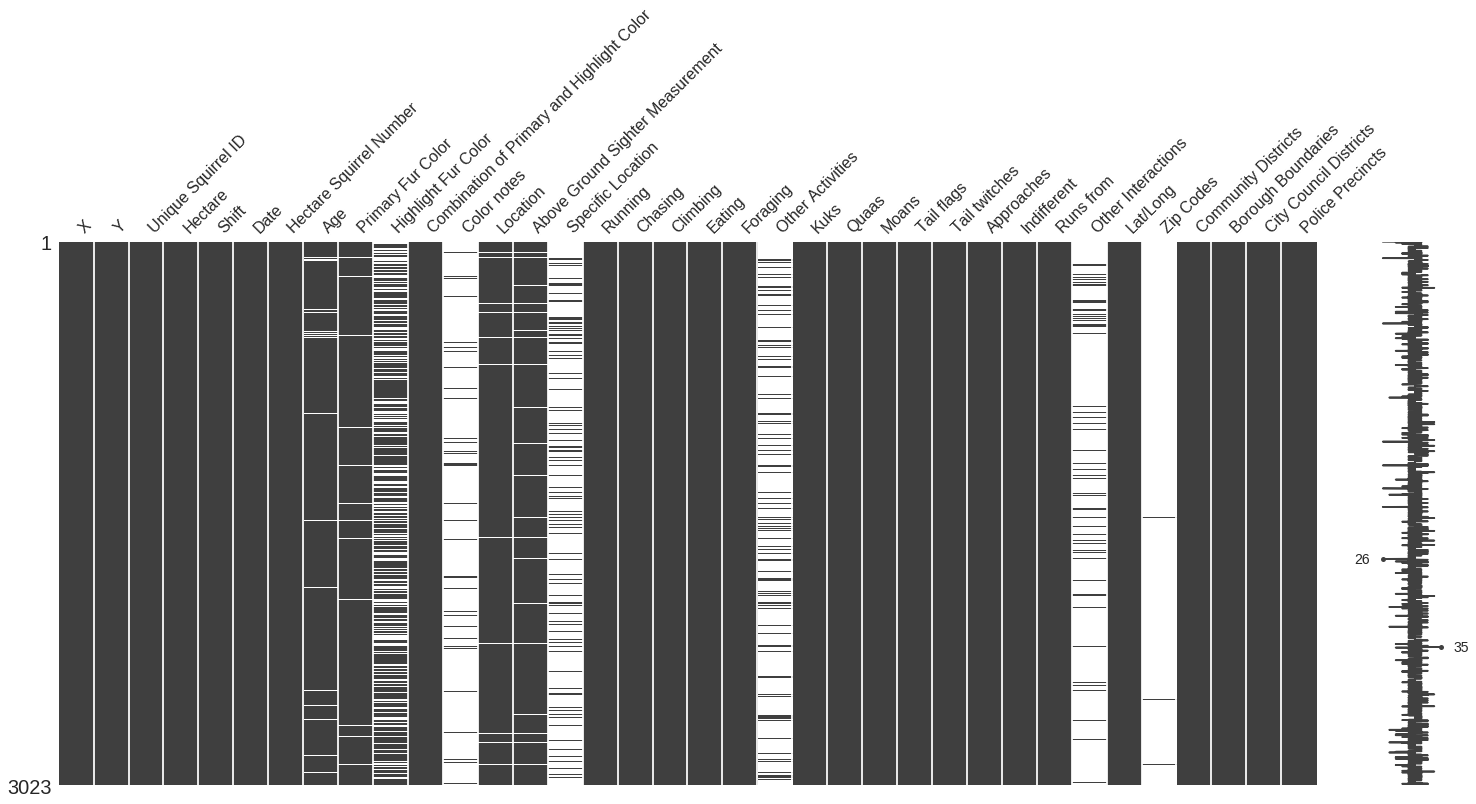

In [37]:
msno.matrix(data)
plt.show()

**Representación Matricial**

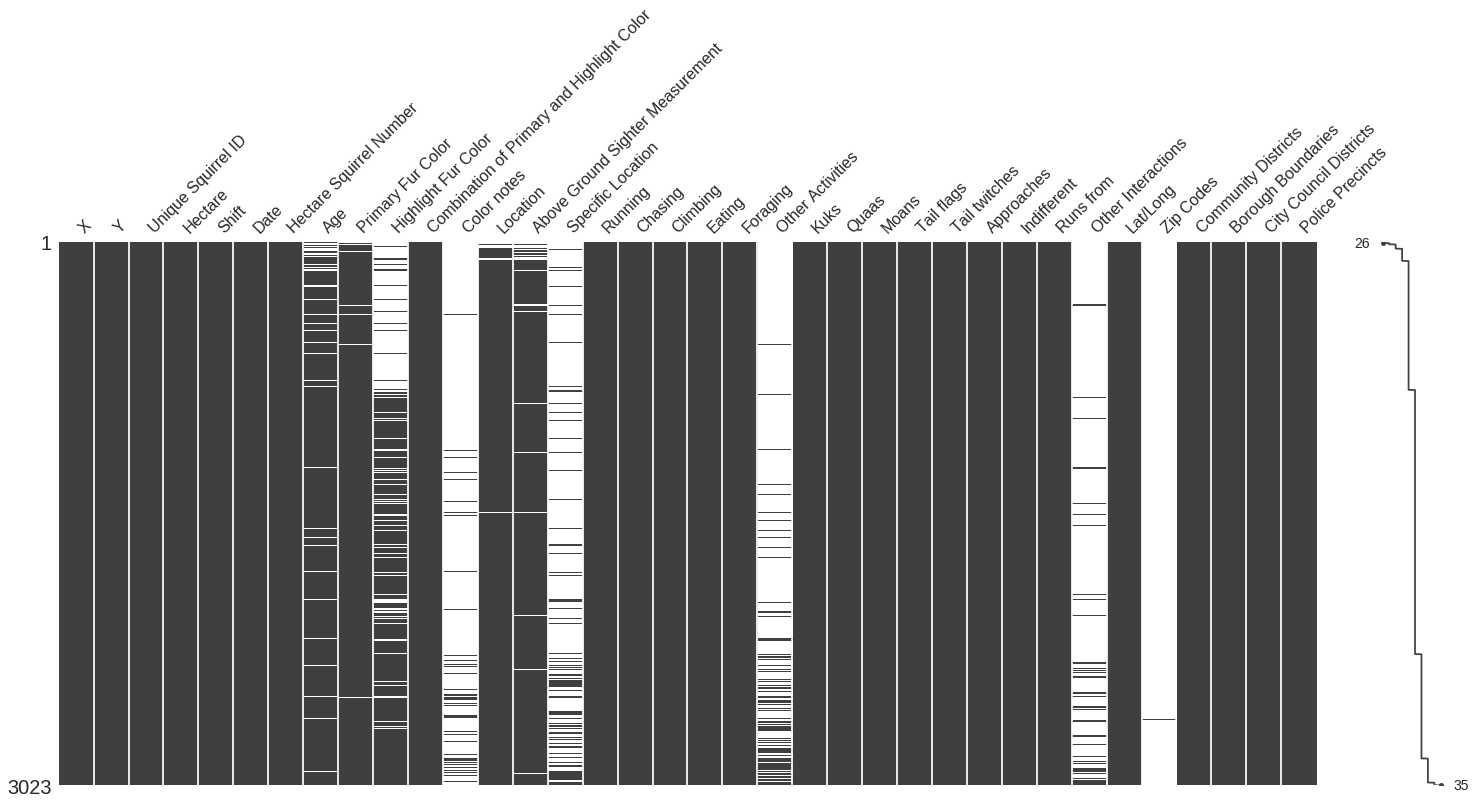

In [38]:
msno.matrix(data, sort='ascending')
plt.show()

**Gráfico de barras**

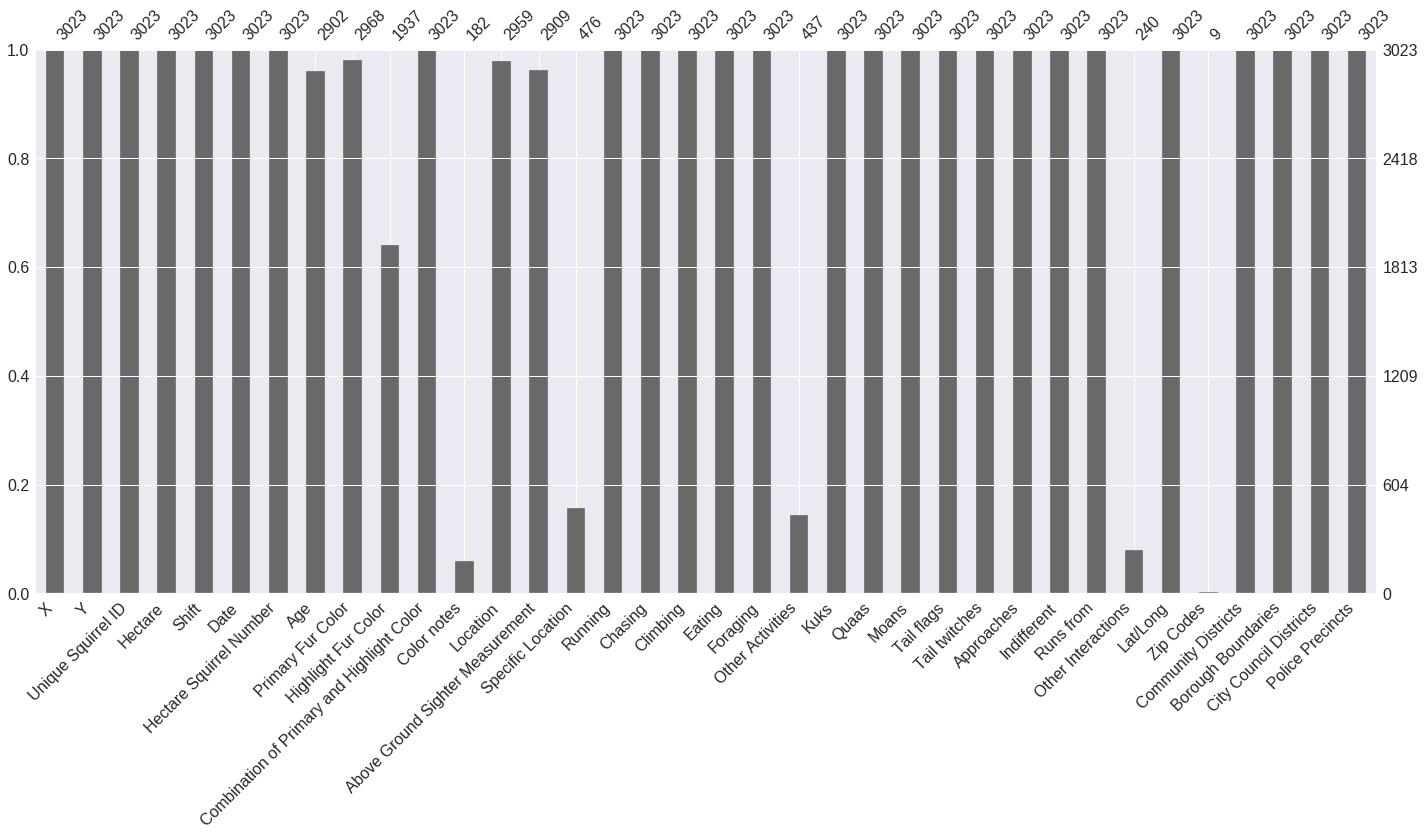

In [39]:
msno.bar(data, log = False)
plt.show()

**Heatmap**

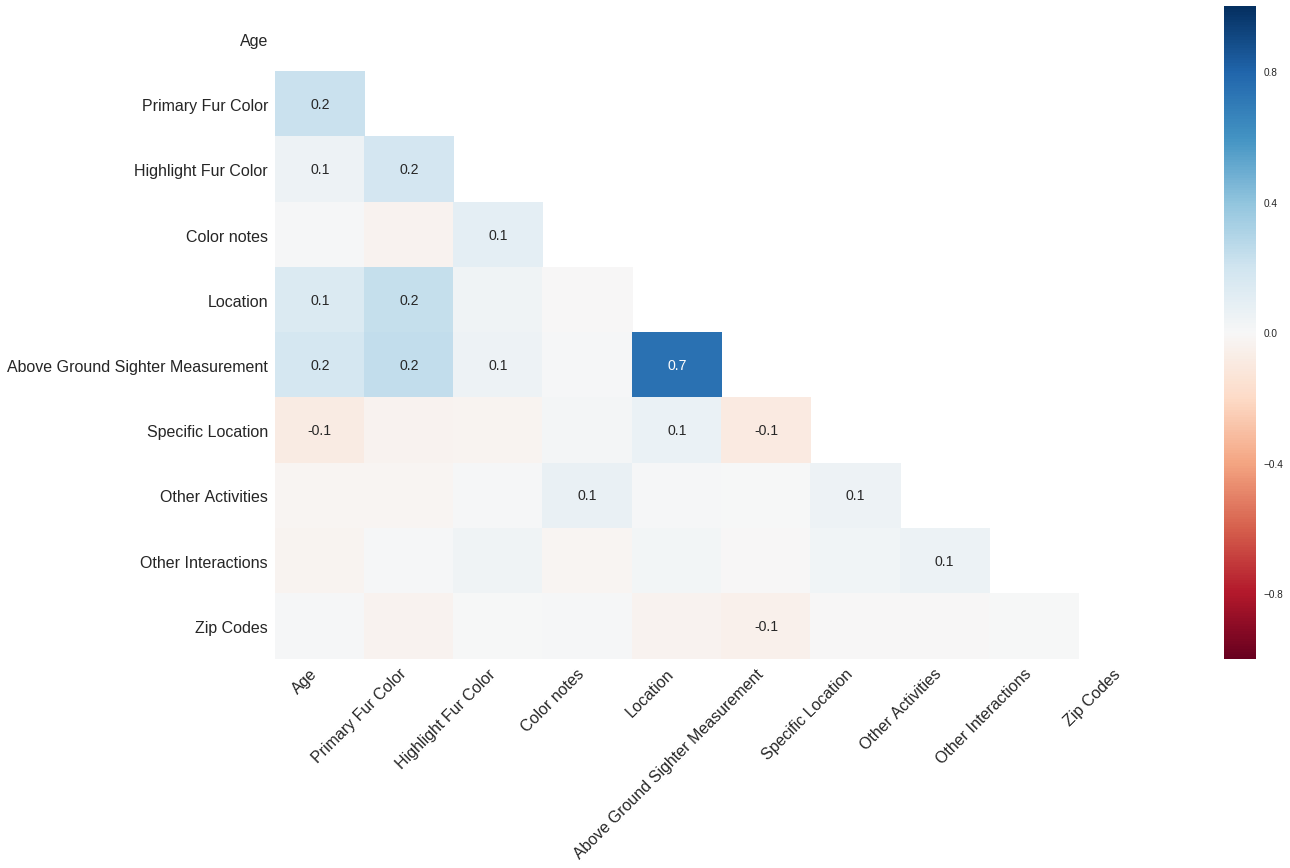

In [40]:
msno.heatmap(data)
plt.show()

**Dendrograma**

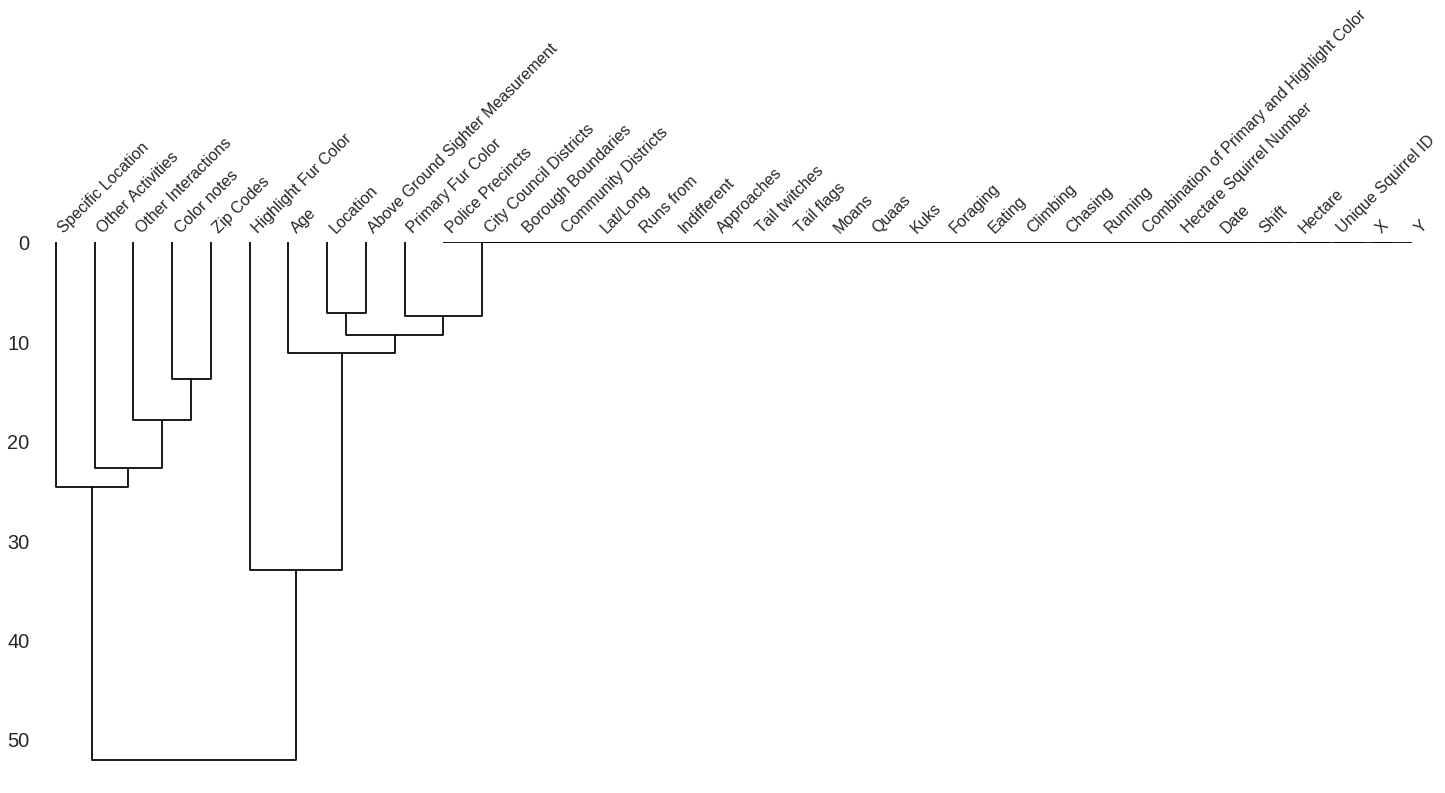

In [41]:
msno.dendrogram(data)
plt.show()

Aunque la librería `missingno` tiene las funciones predefinidas, no es díficil analizar _missing data_ con, por ejemplo, la librería [pandas](https://pandas.pydata.org/).

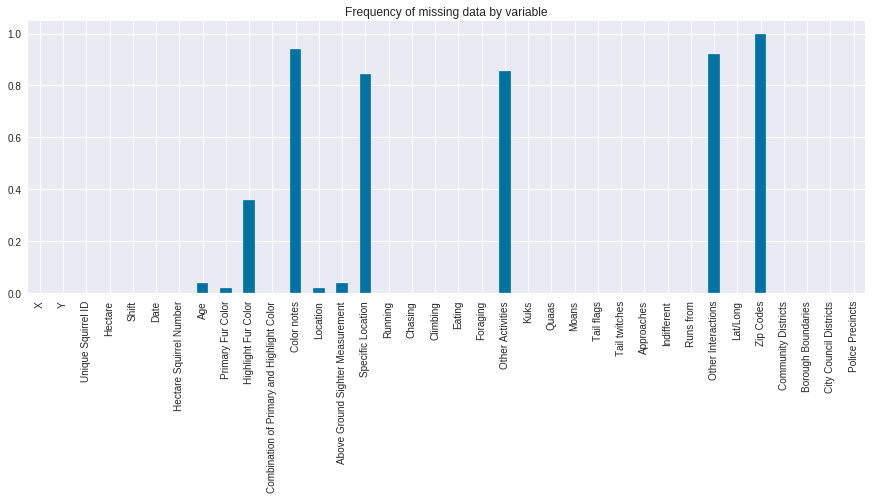

In [42]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 5))
(data.isnull().mean()).plot(kind = 'bar', ax = ax, rot = 90)
ax.set_title('Frequency of missing data by variable')
plt.show()

### Eliminando Datos Ausentes

Eliminar las observaciones con valores perdidos es la opción lógica cuando no se entiende o no se concoce bien la causa por la que no tenemos el dato o no tenemos un método fiable para imputar valores.

### Imputando Valores

<!--
https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
-->

Aunque hay paquetes específicos para trabajar con datos perdidos[^VIM], hay tres tipos de imputación de valores básicas:

  * Asignación mediante algún **estimador**.
    * Estimador de Tendencia Central: Media, Median, ...
    * Asignar un valor máximo o un valor mínimo.
    * Asignar un valor aleatorio.
  * Asignación mediante **estratificación**.
  * Asignación usando **modelos lineales**.
  
[^VIM]: VIM: Visualization and Imputation of Missing Values | [web](https://cran.r-project.org/web/packages/VIM/index.html) | [manual](https://cran.r-project.org/web/packages/VIM/VIM.pdf) |  

En los siguientes ejemplos, hemos utilizado la conocida base de datos _iris_ y hemos considerado 25 valores aleatorios de la variable _petal length (cm)_ como valores perdidos.   

Vamos a utilizar las tres técnicas de imputación descritas y vamos a analizar los resultados. Para ello vamos a comparar los datos imputados con los datos reales (azul) y también vamos a comparar la relación entre la variable _petal length (cm)_ y _petal width (cm)_.

#### Asignación usando la media

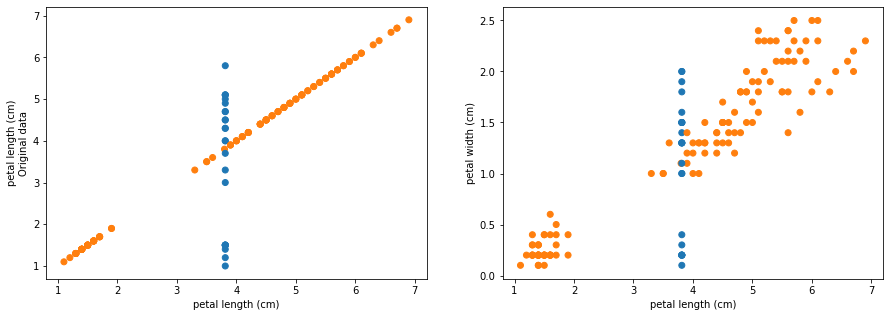

In [2]:
%run '../scripts/dealing_with_missing_data_example_01.py'

**FIGURA**: Assignación del valor medio de la variable _petal length (cm)_ a todos los datos sin valor (izquierda).  Relación entre la variable _petal length (cm)_ y _petal width (cm)_ (derecha).

#### Asignación usando la media y estratificando

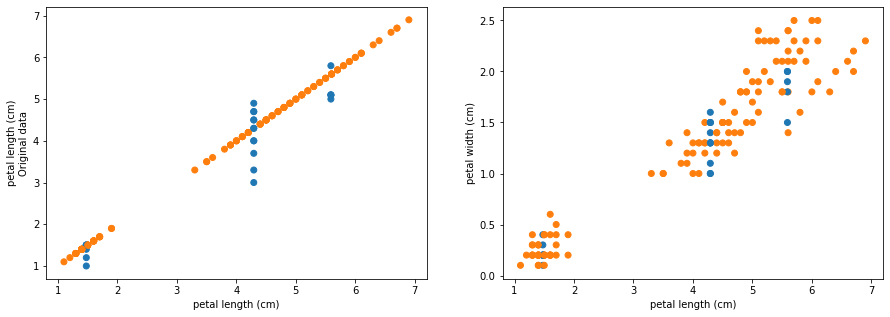

In [4]:
%run '../scripts/dealing_with_missing_data_example_02.py'

**FIGURA**: Assignación del valor medio de la variable _petal length (cm)_ a todos los datos sin valor (izquierda) considerando los tres grupos de flores que hay (_setosa_, _versicolor_, _virginica_).  Relación entre la variable _petal length (cm)_ y _petal width (cm)_ (derecha).

#### Asignación usando modelos lineales

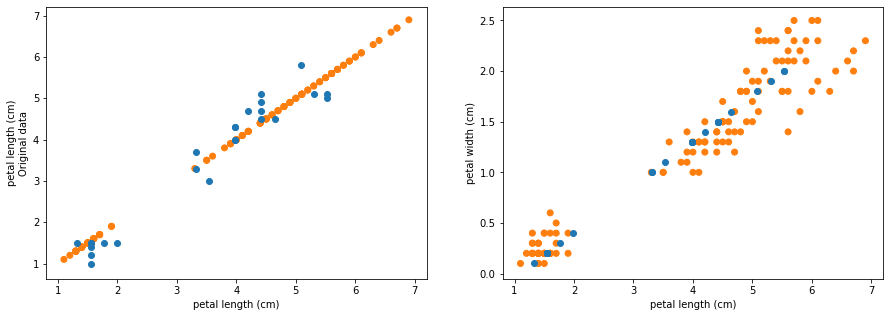

In [5]:
%run '../scripts/dealing_with_missing_data_example_03.py'

**FIGURA**: Assignación del valor medio de la variable _petal length (cm)_ a todos los datos sin valor (izquierda) considerando un modelo lineal aprovechando la correlación existente con la variable _petal width (cm)_.  Relación entre la variable _petal length (cm)_ y _petal width (cm)_ (derecha).

## Casos Atípicos

Un valor atípico (_outlier_) es una observación _distante_ del resto de observaciones. Ante un análisis de observaciones atípicas nos planteamos el siguientes esquema:

Detectamos una observación atípica ¿puede tratarse de un error?
  * Sí -> Si es factible, intentamos recuperar el dato original correcto. Por ejemplo, un registro de alturas en metros y se introduce una altura en centímetros.  
  
  * No -> Evaluamos su tratamiento en los análisis
    * Consideramos que es una muestra atípica, que aunque no se trata de un error, no es coherente con la distribución de la población que estamos estudiando.
    * Consideramos que debe incluirse en los análisis.   
    

### Análisis Univariante

Volvamos al gráfico _boxplot_

<img src=".././images/boxplot_interpretation.png" alt = "Interpretación de un gráfico boxplot" style="width:200px;" />

**Valor atípico leve**

Serán aquellos que cumplen

$$q < Q_{1} - 1.5 \cdot IQR \mbox{ o } q > Q_{3} + 1.5 \cdot IQR$$

**Valor atípico extremo**

Serán aquellos que cumplen

$$q < Q_{1} - 3 \cdot IQR \mbox{ o } q > Q_{3} + 3 \cdot IQR$$


### Análisis Multivariante

¿Cómo observar valores atípicos multivariantes?

  * **Análisis de Componentes Principales**: Si hay observaciones atípicas serán detectadas en las primeras componentes (que buscan explicar la variabilidad) y se podrán observar en la proyección.  
  
  * **Distancia de Mahalanobis**: Es una distancia similar a la distancia Euclidea pero tiene en cuenta la variabilidad y correlación entre variables.


#### Análisis de Componentes Principales

In [43]:
%run '../scripts/dataframe_outlier.py'
df.style\
    .background_gradient(cmap = 'viridis')\
    .set_caption('<b>TABLA</b>: Datos de ejemplo. La observación 5 es claramente atípica.')

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,2,4,3,5,6,7,8,3,2
1,1,5,7,4,2,4,6,4,4
2,3,3,4,5,3,2,5,7,8
3,4,8,9,5,8,2,3,4,6
4,3,6,5,7,3,2,4,3,4
5,12,14,15,21,32,12,19,15,10


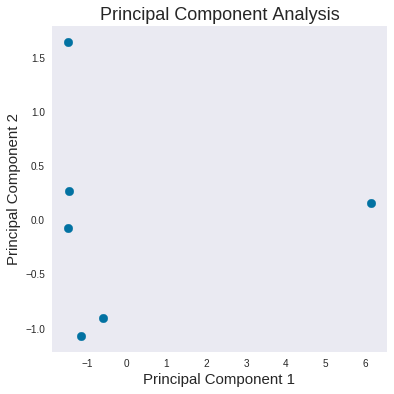

In [44]:
%run '../scripts/dataframe_outlier_pca.py'

**FIGURA**: Análisis de Componentes Principales como herramienta para encontrar observaciones atípicas.

#### Distancia de Mahalanobis

La **distancia de Mahalanobis** es una medida de distancia cuya utilidad radica es la forma de determinar la similitud entre dos variables aleatorias multidimensionales. Se diferencia de la distancia euclídea en que tiene en cuenta la correlación entre las variables aleatorias.

$$\mbox{Distancia de Mahalanobis} = \sqrt{\left(u - v \right) \cdot V^{-1} \cdot \left( u - v \right) ^{T}}$$

$$\mbox{Distancia Euclidea} = \sqrt{\sum \left( u - v \right) ^{2}}$$

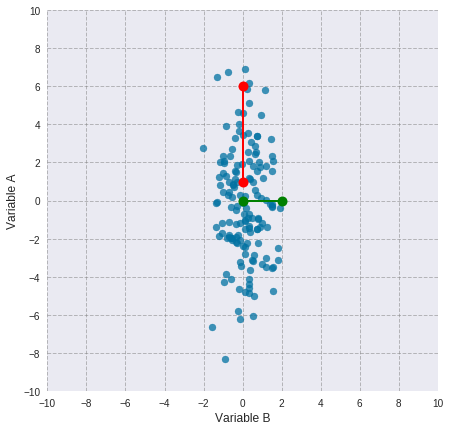

In [45]:
%run '../scripts/distances.py'

**FIGURA**: Distribución de dos variables aleatorias. En el eje $Y$ se muestra una variables con mayor dispersión (variable A) que la representada en el eje $X$ (variable B). Vamos a calular la distancia Euclídea y la distancia de Mahalanobis para las observaciones en rojo y las observaciones en verde.

In [46]:
euclidean([0,1], [0,6])

5.0

In [47]:
euclidean([0,0], [2,0])

2.0

In [48]:
mahalanobis([0,1], [0,6], np.linalg.inv(np.cov(A,B)))

1.71180601544895

In [49]:
mahalanobis([0,0], [2,0], np.linalg.inv(np.cov(A,B)))

2.4435835486481885

Aunque visualmente hay más distancia entre las observaciones en rojo, la distancia de Mahalanobis tiene en consideración la dispersión en cada variable y por eso la distancia entre las observaciones en verde es mayor es con esa distancia.

¿Cómo puede ayudarnos la distancia de Mahalanobis a buscar observaciones atípicas?

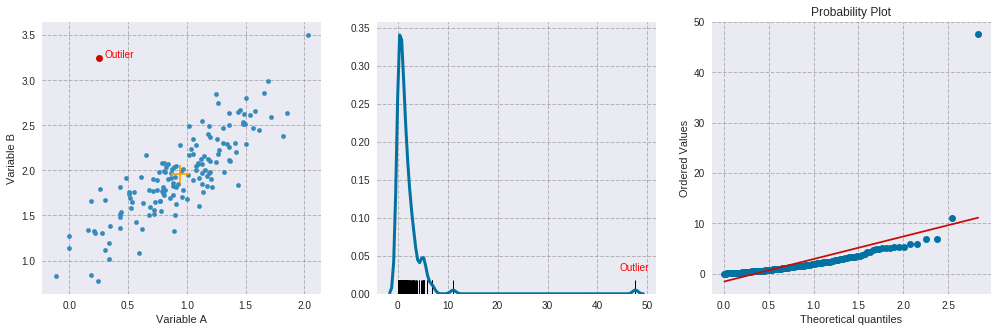

In [50]:
%run '../scripts/mahalanobis_example_01.py'

**FIGURA**: Distribución observada con un valor claramente atípico (rojo) y distribución de la distancia de _Mahalanobis_ asociada a dicha cohorte.

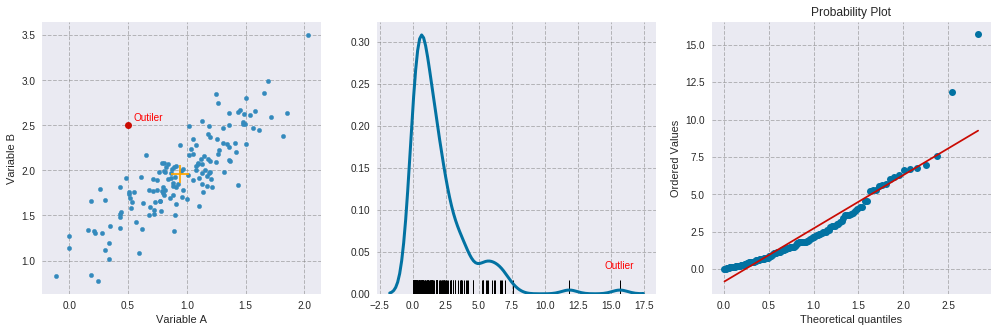

In [51]:
%run '../scripts/mahalanobis_example_02.py'

**FIGURA**: Distribución observada con un valor atípico (rojo) y distribución de la distancia de _Mahalanobis_ asociada a dicha cohorte.

## Verificación de los Supuestos del Análisis Multivariante

Una vez estudiados los datos: distribución, valores perdidos, valores atípicos, ... llega el momento de estudiar los supuestos necesarios para realizar análisis estadísticos. 

**¿Es necesario?**

No, pero recomendable

**¿Entonces?**

Si queremos aplicar test paramétricos (*t*-test, ANOVA, ...) debemos asegurarnos que se cumplen los supuestos necesarios para poder aplicarlos.

<table width="800px" border="0" cellpadding="5">

<tr>

<td align="center" style="width:400px; vertical-align:center;">
    <center>    
        <img src=".././images/flowchart.png" alt = "Flowchart for metabolomics data analysis workflow, applied to an aging research in healthy population." style="width:400px;" />
    </center>
</td>

<td align="left" style="width:400px; vertical-align:top;">
    <b>Enhancing Metabolomics Research Through Data Mining</b>
    <br>
    <br>
    <b>Abstract</b>: Metabolomics research, like other disciplines utilizing high-throughput technologies, generates a large amount of data for every sample. Although handling this data is a challenge and one of the biggest bottlenecks of the metabolomics workflow, it is also the clue to accomplish valuable results. This work has been designed to supply methodological data mining guidelines, describing systematically the steps to be followed in metabolomics data exploration. Instrumental raw data refinement in the pre-processing step and assessment of the statistical assumptions in pre-treatment directly affect the results of subsequent univariate and multivariate analyses. A study of aging in a healthy population was selected to represent this data mining process. Multivariate analysis of variance and linear regression methods were used to analyze the metabolic changes underlying aging. Selection of both multivariate methods aims to illustrate the treatment of age from two rather different perspectives, as a categorical variable and a continuous variable.  
    
</td>    

</tr>    
    
</table>

La **Estadística Paramétrica** es una rama de la estadística inferencial que comprende los procedimientos estadísticos basados en distribuciones conocidas. 

La **Estadística no Paramétrica** es una rama de la estadística inferencial que estudia las pruebas y modelos estadísticos cuya distribución subyacente no se ajusta a criterios paramétricos. Su distribución no puede ser definida _a priori_, pues son los datos observados los que la determinan.

| Test Paramétricos                     | Test no Paramétricos                       | Supuestos                  |
|---------------------------------------|--------------------------------------------|----------------------------|
| [t-test pareado](https://es.wikipedia.org/wiki/Prueba_t_de_Student)                        | [Prueba de los rangos con signo de Wilcoxon](https://es.wikipedia.org/wiki/Prueba_de_los_rangos_con_signo_de_Wilcoxon) | Normalidad                 |
| [t-test no pareado](https://es.wikipedia.org/wiki/Prueba_t_de_Student)                     | [Prueba de Mann-Whitney](https://es.wikipedia.org/wiki/Prueba_de_Mann-Whitney)                     | Normalidad                 |
| [ANOVA](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_varianza)                                 | [Prueba de Kruskal-Wallis](https://es.wikipedia.org/wiki/Prueba_de_Kruskal-Wallis)                   | Independencia de las observaciones <br> La distribución de los residuales debe ser normal <br> Homocedasticidad: homogeneidad de las varianzas                           |
| [ANOVA para medias repetidas](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_varianza)            | [Prueba de Friedman](https://es.wikipedia.org/wiki/Prueba_de_Friedman)                         | Independencia de las observaciones <br> La distribución de los residuales debe ser normal <br> Homocedasticidad: homogeneidad de las varianzas                           |
| [Coeficiente de Correlación de Pearson](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) | [Coeficiente de Correlación de Spearman](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Spearman)     | Linealidad entre variables |

### Normalidad Univariante

La normalidad de las distribuciones es la primera condición a comprobar antes de realizar ninguna prueba paramétrica.

En R existen paquetes específicos para realizar pruebas de normalidad, como `nortest`[^nortest] y `normtest`[^normtest], aunque la prueba `shapiro.test` (en el paquete básico de librerías de R) ya es una buena opción para estudiar la normalidad.

En Python, en el módulo `stats` del paquete SciPy, están las funciones `shapiro` y `normaltest`.

[^nortest]: nortest: Tests for Normality | [web](https://cran.r-project.org/web/packages/nortest/index.html) | [manual](https://cran.r-project.org/web/packages/nortest/nortest.pdf) |  
[^normtest]: normtest: Tests for Normality | [web](https://cran.r-project.org/web/packages/normtest/index.html) | [manual](https://cran.r-project.org/web/packages/normtest/normtest.pdf) |

#### Tests

Vamos a generar algunas variables aleatorias y vamos a aplicar el test de `shapiro`.

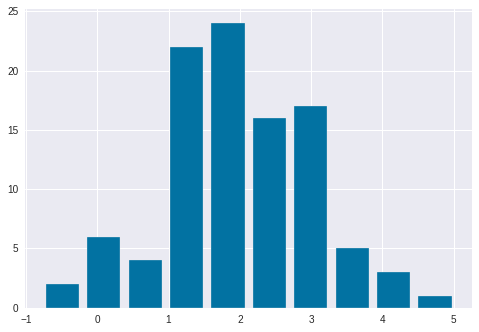

W: 0.99	 statistic: 0.7831

In [52]:
%run '../scripts/shapiro_example_01.py'

Hemos generado 100 observaciones de una variable aleatoria con distribución normal. El test de `shapiro` (p > 0.05) nos confirma que los datos provienen de una distribución normal.

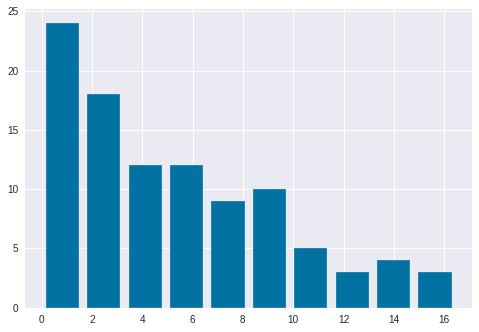

W: 0.92	 statistic: 0.0000

In [53]:
%run '../scripts/shapiro_example_02.py'

Hemos generado 100 observaciones de una variable aleatoria con distribución normal, cada observación la hemos elevado al cuadrado. El test de `shapiro` (p < 0.05) nos confirma que esta nueva variable no provienen de una distribución normal.

#### Análisis Gráfico. Gráfico Q-Q

Es un método gráfico para el diagnóstico de diferencias entre la distribución de probabilidad de una población de la que se ha extraído una muestra aleatoria y una distribución teórica. En particular puede comprobarse la no-normalidad de la distribución de una variable en una población.

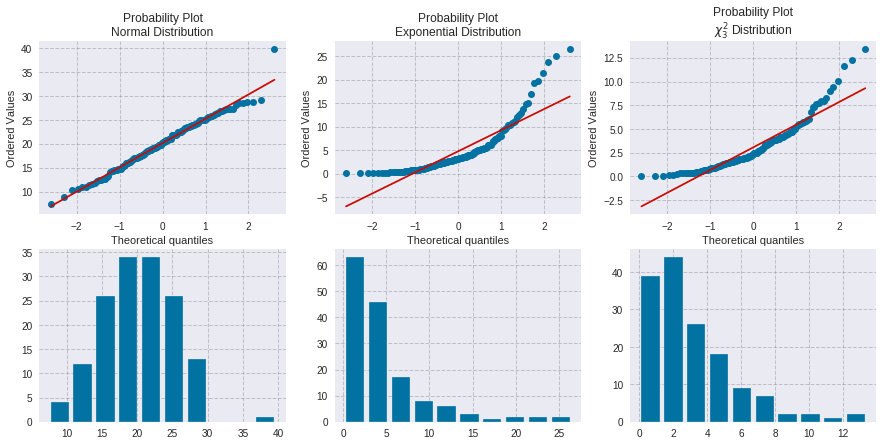

In [54]:
%run '../scripts/qqplot.py'

**FIGURA**: Gráfico Q-Q de tres distribuciones: distribución normal, exponencial y $\chi^{2}_{3}$ (arriba). Histograma de las tres distribuciones (abajo).

#### ¿Se puede corregir?

Si las observaciones siguen una distribución continua se pueden aplicar transformaciones y llevar a la normalidad en la mayoría de los casos mediante dichas transformaciones.

La más usual de las correcciones es la transformación de potencia o [transformación de Box-Cox](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation) cuya definición analítica es la siguiente:

$${\displaystyle y_{i}^{(\lambda )}={\begin{cases}{\dfrac {y_{i}^{\lambda }-1}{\lambda }}&{\text{if }}\lambda \neq 0,\\\ln y_{i}&{\text{if }}\lambda =0,\end{cases}}}$$

<table width="850px" border="0" cellpadding="5">

<tr>

<td align="center" style="width:600px; vertical-align:center;">
    <center>    
        <img src=".././images/boxcox.png" alt = "Flowchart for metabolomics data analysis workflow, applied to an aging research in healthy population." style="width:600px;" />
    </center>
</td>

<td align="left" style="width:250px; vertical-align:top; padding:15px">
Univariate normality assessment of the phosphatidylcholine PC(16:0/20:4)—upper panels, and the triglyceride TG(56:8)—lower panels. A bell-shape distribution is shown in the histogram of the normally distributed phosphatidylcholine (a), and, therefore, the optimal lambda obtained in the Box–Cox normality plot is 1 (b), which means untransformation (c) and unchanged results in Q–Q plots (d). Nevertheless, the histogram of the triglyceride displays a significant right skewness (e). The Box–Cox normality plot (f) shows the maximum value of the correlation coefficient at lambda = 0 or a logarithmic transformation as optimal transformation to ensure the normality. The histogram after applying the Box–Cox transformation (g) illustrates a data set for which the normality assumption is reasonable. This is verified with a normal probability Q–Q plot (h) of the transformed data. Original and transformed data is displayed in red and green, respectively. 
    

</td>    

</tr>    
    
</table>

### Análisis de la Varianza

**Homocedasticidad**

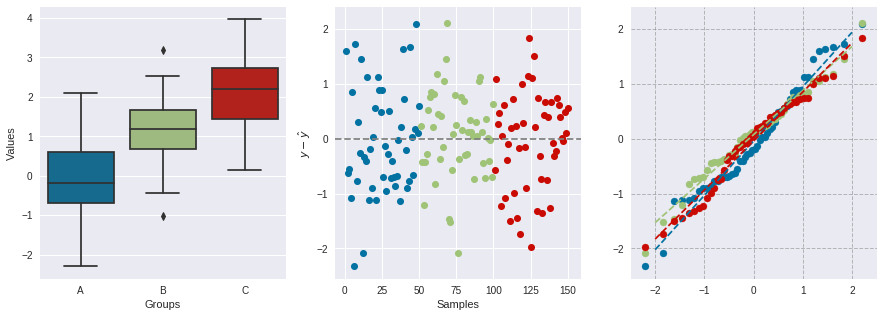

In [55]:
%run '../scripts/homocedasticidad.py'

**FIGURA**: Representación gráfica de homogeneidad de variaciones. Como los grupos tienen una desviación estándar similar (izquierda), los residuos se mantienen constantes a lo largo de todas las muestras (centro). La distribución normal de los residuos se muestra en una gráfica de probabilidad normal Q-Q (derecha).

**Heterocedasticidad**

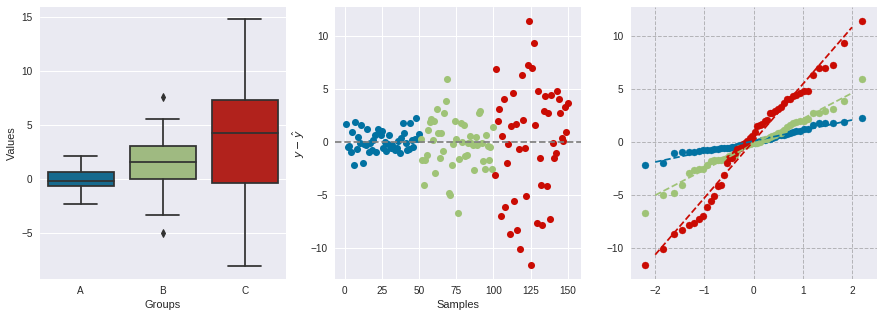

In [56]:
%run '../scripts/heterocedasticidad.py'

**FIGURA**: Representación gráfica de heterogeneidad de variaciones. Como los grupos tienen una desviación estándar diferente (izquierda), los residuos varían según el grupo a lo largo de todas las muestras (centro). La distribución normal de los residuos por grupo se muestra en una gráfica de probabilidad normal Q-Q (derecha).

**Heterocedasticidad y Distribución no Normal de los Residuos**

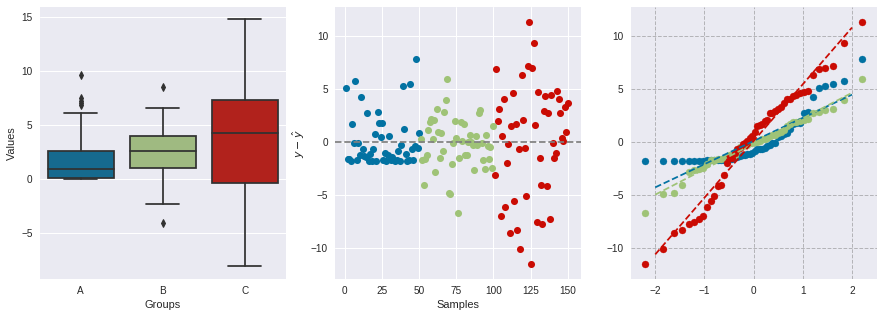

In [57]:
%run '../scripts/heterocedasticidad_no_normalidad.py'

**FIGURA**: Representación gráfica de heterogeneidad de variaciones y distribución residual no normal. Como los grupos tienen una desviación estándar diferente (izquierda), los residuos varían según el grupo a lo largo de todas las muestras (centro) y con sesgo (observaciones del grupo A, en azul). La distribución normal de los residuos por grupo se muestra en una gráfica de probabilidad normal Q-Q (derecha). las muestras del grupo A (azul) no siguen una distribución normal.

## **Bibliografía**

<table width="800" border="0" cellpadding="5">

<tr>

<td align="center" valign="center">
<center>    
<img src=".././images/books/practical_statistics_for_data_scientists.jpg" alt = "Practical Statistics for Data Scientists" style="width:200px;height:257px;" />
</center>
</td>
    
<td align="center" valign="center">
<center>    
<img src=".././images/books/think_stats.jpg" alt = "Think Stats" style="width:200px;height:257px;" />
</center>
</td>    

</tr>
    
<tr>
<td align="center" valign="center"><center>Practical Statistics for Data Scientists</center></td>    
<td align="center" valign="center"><center>Think Stats</center></td>            
</tr>
    
<tr>
</tr>    
    
</table>

--- 

$$\Huge{+h\left\{a_{n}\right\}^{k} \,\,\, \varphi \circ \cup}$$

---